# Dogs vs Cats Image Classification

This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images of dogs and cats.

## Setup

First, we'll set up the environment by installing necessary libraries and downloading the dataset.

### Configure Kaggle API

This cell configures the Kaggle API to download the dataset. Make sure you have uploaded your `kaggle.json` file to the `/content/` directory in the Colab environment.

In [76]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Download the Dataset

This cell downloads the "dogs-vs-cats" dataset from Kaggle.

In [77]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:03<00:00, 209MB/s]
100% 1.06G/1.06G [00:03<00:00, 292MB/s]


### Unzip the Dataset

This cell unzips the downloaded dataset.

In [78]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

## Data Preparation

Next, we'll load and preprocess the image data.

### Import Libraries

Import the necessary libraries for data manipulation, model building, and visualization.

In [79]:
import numpy as np
import pandas as pd

### Import TensorFlow and Keras

Import TensorFlow and Keras for building and training the neural network.

In [80]:
import tensorflow as tf
from tensorflow import keras

### Import Keras Layers

Import the specific layers needed for the CNN model.

In [81]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

### Load Training Dataset

Load the training images using `image_dataset_from_directory`. This function automatically infers labels from the directory structure.

In [82]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.


### Load Testing Dataset

Load the testing images using `image_dataset_from_directory`.

In [83]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 5000 files belonging to 2 classes.


### Preprocess Data

Define a function to preprocess the images by scaling the pixel values to the range [0, 1].

In [84]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

### Apply Preprocessing to Datasets

Apply the preprocessing function to the training and testing datasets.

In [85]:
train_data = train_ds.map(process)
test_data = test_ds.map(process)

## Model Building

Now, we'll build the CNN model.

### Define the CNN Model

Define a sequential CNN model with convolutional, pooling, batch normalization, flatten, and dense layers.

In [86]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary

Display the summary of the model architecture, showing the layers, output shapes, and number of parameters.

In [87]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

### Compile the Model

Compile the model by specifying the optimizer, loss function, and metrics.

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Training

Train the model using the prepared training and testing data.

### Train the Model

Train the model for a specified number of epochs using the `fit` method.

In [89]:
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 89ms/step - accuracy: 0.5546 - loss: 2.1478 - val_accuracy: 0.6946 - val_loss: 0.5796
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.6926 - loss: 0.5875 - val_accuracy: 0.7262 - val_loss: 0.5479
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7463 - loss: 0.5143 - val_accuracy: 0.7616 - val_loss: 0.5006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7919 - loss: 0.4417 - val_accuracy: 0.7412 - val_loss: 0.6380
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8210 - loss: 0.3890 - val_accuracy: 0.7892 - val_loss: 0.4789
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8490 - loss: 0.3321 - val_accuracy: 0.7938 - val_loss: 0.4835
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8851 - loss: 0.2644 - val_accuracy: 0.8034 - val_loss: 0.6174
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9200 - loss: 0.1985 - 

## Model Evaluation and Prediction

Evaluate the trained model and make predictions on new images.

### Plot Accuracy

Plot the training and validation accuracy over the epochs.

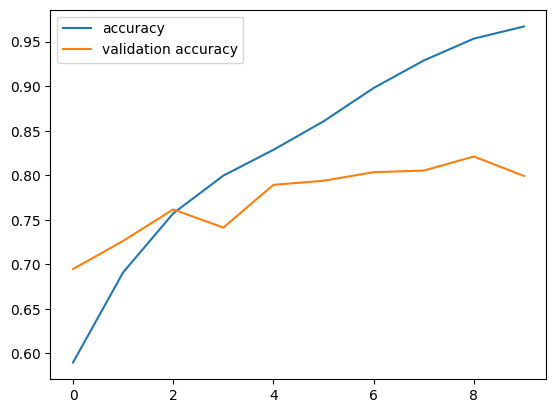

In [90]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

### Plot Loss

Plot the training and validation loss over the epochs.

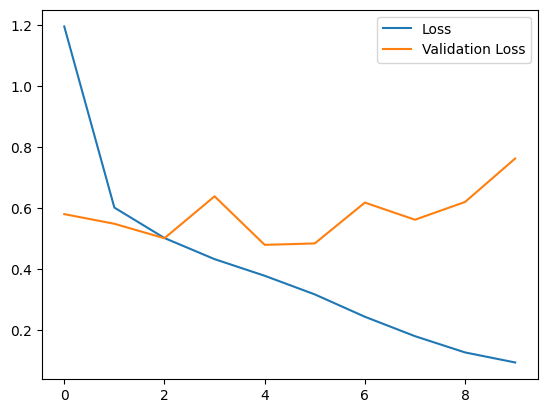

In [91]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Import OpenCV

Import OpenCV for image manipulation.

In [92]:
import cv2

### Upload Test Images

Please upload the image files 'dog.jpg' and 'cat.jpg' to the `/content/` directory. You can do this by clicking on the folder icon in the left sidebar, navigating to the `/content/` directory, and then dragging and dropping your image files into that folder.

In [93]:
# After uploading the images, re-run this cell to load them
dog_test = cv2.imread('/content/dog_img.jpg')
cat_test = cv2.imread('/content/cat_img.jpeg')

# You can then re-run the next cells to display the images and make predictions.

### Display Dog Image

Display the uploaded dog image.

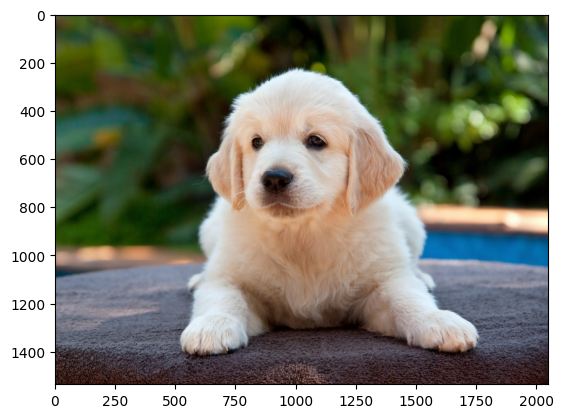

In [94]:
plt.imshow(cv2.cvtColor(dog_test, cv2.COLOR_BGR2RGB))

### Display Cat Image

Display the uploaded cat image.

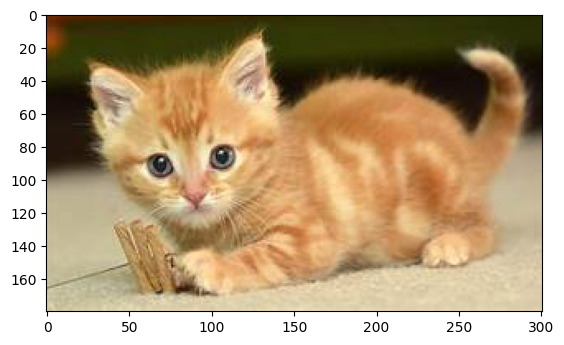

In [95]:
plt.imshow(cv2.cvtColor(cat_test, cv2.COLOR_BGR2RGB))

### Resize Test Images

Resize the uploaded test images to match the input size of the model.

In [96]:
dog_test = cv2.resize(dog_test, (256, 256))
cat_test = cv2.resize(cat_test, (256, 256))

### Prepare Dog Image for Prediction

Reshape the dog image to include a batch dimension, as required by the model's `predict` method.

In [97]:
test_input = dog_test.reshape((1, 256, 256, 3))

### Predict on Dog Image

Make a prediction on the dog image using the trained model. A value close to 1 indicates a dog, and a value close to 0 indicates a cat.

In [98]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


array([[1.]], dtype=float32)

### Prepare Cat Image for Prediction

Reshape the cat image to include a batch dimension.

In [99]:
test_input_ = cat_test.reshape((1, 256, 256, 3))

### Predict on Cat Image

Make a prediction on the cat image using the trained model. A value close to 1 indicates a dog, and a value close to 0 indicates a cat.

In [100]:
model.predict(test_input_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.]], dtype=float32)